## Solvnig Problems by Searching

### 1. Search problems and solutions

A search problem can be defined formally as follows:
- A **set of possible states** that the environment can be in. We call this the state space.
- The **initial state** that the agent starts in
- A set of one or more **goal states**.
- The **actions** available to the agent, Given a state s, ACTIONS(s) returns a finite set of actions that can be executed in s
- **A transition model**, which describes what each action does
- An **action cost function**, which gives the numeric cost of applying action a in state s to reach state s'

A sequence of actions forms a **path**, and **a solution** is a path from the initial state to a goal state.

An **optimal solution** has the lowest path cost among all solutions.

The state space can be represented as a **graph** in which the vertices are states and the directed edges between them are actions

#### 1.2 Measuring problem-solving performance

- **Completeness**: Is the algorithm guaranteed to find a solution when there is one, and to correctly report failure when there is not?
- **Cost optimality**: Does it find a solution with the lowest path cost of all solutions?
- **Time complexity**: How long does it take to find a solution? This can be measured in
seconds, or more abstractly by the number of states and actions considered.
- **Space complexity**: How much memory is needed to perform the search?

#### 2 Uninformed Search Strategies

An uninformed search algorithm is given no clue about how close a state is to the goal(s).

#### 2.1 Breadth-first search

- When all actions have the same cost, an appropriate strategy is **breadth-first search**, in which the root node is expanded first, then all the successors of the root node are expanded next, then their successors, and so on.

- Use **first-in-first-out queue**


- Breadth-first search always finds a solution with a minimal number of actions.

- Breadth-first search is complete

<img src="bfs.png" width=500 height=500 />

#### 2.2 Depth-first search

- Depth-first search always expands the deepest node in the frontier first.

  
- We can implement it recursively, or iteratively with the help of a stack (LIFO) that stores at each step future nodes to be visited.

- It is possible that the found solution is not optimal.


<img src="dfs.png" width=400 height=400 />

<img src="comp_.png" width=500 height=500 />

#### 2.3 Depth-limited and iterative deepening search

- It is a version of depth-first search in which we supply a depth limit, $l$, and treat all nodes at depth $l$ as if they had no successors.

- **Iterative deepening** search solves the problem of picking a good value for $l$ by trying all values: first 0, then 1, then 2, and so on—until either a solution is found, or the depth- limited search returns the failure value rather than the cutoff value.




<img src="dl.png" width=500 height=500 />

### Searching a graph to find path from start to goal node?

In [24]:
def successors_f(state): 
    successors = {'a':  ['b', 'c', 'd'],
                  'b':  ['e', 'f', 'g'],
                  'c':  ['a', 'h', 'i'],
                  'd':  ['j', 'z'],
                  'e':  ['a', 'k', 'l'],
                  'g':  ['m'],
                  'k':  ['z']}
    return successors.get(state, [])

In [25]:
successors_f('a')

['b', 'c', 'd']

### Breadth and Depth search

In [69]:
def search(start_state, goal_state, successors_f, breadth_first):

    expanded = {}
    
    unexpanded = [(start_state, None)]
    
    if start_state == goal_state:
        return [start_state]
    
    while unexpanded:
        current_pair = unexpanded.pop()
        children_of_pair = successors_f(current_pair[0])
        
        
        expanded.update({tuple(current_pair[0]) : current_pair[1]})
       
        children_of_pair = [child for child in children_of_pair if (tuple(child) not in expanded)]
        ch = children_of_pair + []
        for child in children_of_pair:
            for u in unexpanded:
                if u[0] == child or u[1] == child:
                    ch.remove(child)
                    break
        
        children_of_pair = ch
        
        
        if goal_state in children_of_pair:
            
            solution_path = [current_pair[0], goal_state]
            parent = current_pair[1]
            
            while parent != None:
                
                solution_path = [parent] + solution_path
                
                
                parent = expanded.get(tuple(parent))
            
            return solution_path
        
        
        children_of_pair.sort()
        children_of_pair.reverse()
        children_of_pair = [(child, current_pair[0]) for child in children_of_pair if True]
        
        
        if breadth_first:
            unexpanded = children_of_pair + unexpanded
        else:
            unexpanded = unexpanded + children_of_pair
    
    return 'Goal not found'

In [70]:
search('a', 'e', successors_f,True)

['a', 'b', 'e']

In [71]:
for goal in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'z']:
    path = search('a', goal, successors_f,True)
    print(f'Path from a to {goal}: {path}')

Path from a to a: ['a']
Path from a to b: ['a', 'b']
Path from a to c: ['a', 'c']
Path from a to d: ['a', 'd']
Path from a to e: ['a', 'b', 'e']
Path from a to f: ['a', 'b', 'f']
Path from a to g: ['a', 'b', 'g']
Path from a to h: ['a', 'c', 'h']
Path from a to i: ['a', 'c', 'i']
Path from a to j: ['a', 'd', 'j']
Path from a to k: ['a', 'b', 'e', 'k']
Path from a to l: ['a', 'b', 'e', 'l']
Path from a to m: ['a', 'b', 'g', 'm']
Path from a to z: ['a', 'd', 'z']


### Navigation Problem

We'll try a navigation problem around a grid of size 10 x 10. Rows and columns will be indexed from 0 to 9.

In [72]:
def grid_successors(state):
    row, col = state
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append((newr, newc))
    return succs

In [73]:
grid_successors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [74]:
grid_successors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [75]:
path_dfs = search((0, 0), (9, 9), grid_successors,False)

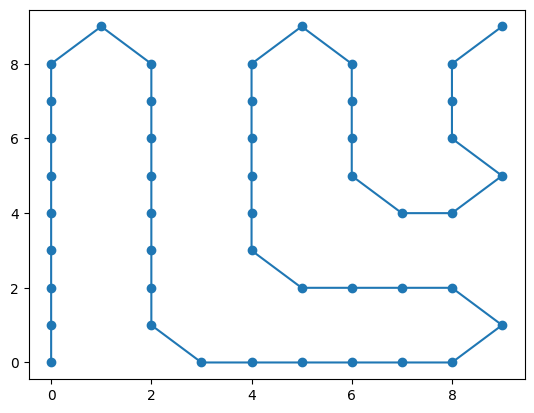

In [76]:
import matplotlib.pyplot as plt

rows = [location[0] for location in path_dfs]
cols = [location[1] for location in path_dfs]
plt.plot(rows, cols, 'o-');

In [77]:
path_bfs = search((0, 0), (9, 9), grid_successors,True)
print(path_bfs)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


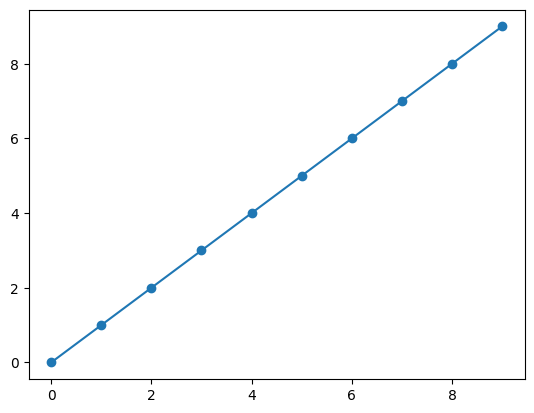

In [78]:
rows = [location[0] for location in path_bfs]
cols = [location[1] for location in path_bfs]
plt.plot(rows, cols, 'o-');